In [1]:
library(quantmod)
library(lubridate)
library(rvest)
library(ggplot2)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
# Load necessary library
library(quantmod)

# Define stock symbol and date range
stock_symbol <- "AAPL"
start_date <- "2013-01-01"
end_date <- "2024-01-01"

# Fetch stock data from Yahoo Finance
getSymbols(stock_symbol, src = "yahoo", from = start_date, to = end_date)

# Convert to data frame
aapl_df <- data.frame(Date = index(AAPL), coredata(AAPL))

# Display first few rows
head(aapl_df)

[1] "AAPL"

,Date,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2013-01-02,19.77929,19.82143,19.34393,19.60821,560518000,16.66902
2,2013-01-03,19.56714,19.63107,19.32143,19.36071,352965200,16.45861
3,2013-01-04,19.17750,19.23679,18.77964,18.82143,594333600,16.00016
4,2013-01-07,18.64286,18.90357,18.40000,18.71071,484156400,15.90605
5,2013-01-08,18.90036,18.99607,18.61607,18.76107,458707200,15.94885
6,2013-01-09,18.66071,18.75036,18.42821,18.46786,407604400,15.69959


In [3]:
# Define the file path
file_path <- "../data/raw/aapl_stock_data.csv"

# Ensure the directory exists before saving
if (!dir.exists("../data/raw")) {
  dir.create("../data/raw", recursive = TRUE)
}

# Save the data as CSV
write.csv(aapl_df, file = file_path, row.names = FALSE)

# Confirmation message
cat("✅ Data saved successfully at:", file_path, "\n")

✅ Data saved successfully at: ../data/raw/aapl_stock_data.csv 


In [4]:
# Load necessary libraries
library(dplyr)  # For data manipulation


######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed to  #
# work, which breaks lag(my_xts). Calls to lag(my_xts) that you type or       #
# source() into this session won't work correctly.                            #
#                                                                             #
# Use stats::lag() to make sure you're not using dplyr::lag(), or you can add #
# conflictRules('dplyr', exclude = 'lag') to your .Rprofile to stop           #
# dplyr from breaking base R's lag() function.                                #
#                                                                             #
# Code in packages is not affected. It's protected by R's namespace mechanism #
# Set `options(xts.warn_dplyr_breaks_lag = FALSE)` to suppress this warning.  #
#                                      

## Clean and Prepare the Data

In [5]:
# Read the saved stock data
file_path <- "../data/raw/aapl_stock_data.csv"
aapl_data <- read.csv(file_path)

# Display first few rows
head(aapl_data)

,Date,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2013-01-02,19.77929,19.82143,19.34393,19.60821,560518000,16.66902
2,2013-01-03,19.56714,19.63107,19.32143,19.36071,352965200,16.45861
3,2013-01-04,19.17750,19.23679,18.77964,18.82143,594333600,16.00016
4,2013-01-07,18.64286,18.90357,18.40000,18.71071,484156400,15.90605
5,2013-01-08,18.90036,18.99607,18.61607,18.76107,458707200,15.94885
6,2013-01-09,18.66071,18.75036,18.42821,18.46786,407604400,15.69959


In [6]:
# Check for missing values
sum(is.na(aapl_data))

[1] 0

In [7]:
# Remove rows with missing values
aapl_data <- na.omit(aapl_data)

# Verify data after cleaning
sum(is.na(aapl_data))  # Should return 0

[1] 0

In [8]:
# Ensure processed directory exists
if (!dir.exists("../data/processed")) {
  dir.create("../data/processed", recursive = TRUE)
}

# Save cleaned data
write.csv(aapl_data, "../data/processed/aapl_stock_data_cleaned.csv", row.names = FALSE)

cat("✅ Cleaned data saved successfully at: ../data/processed/aapl_stock_data_cleaned.csv\n")

✅ Cleaned data saved successfully at: ../data/processed/aapl_stock_data_cleaned.csv


In [9]:
# Load necessary libraries
library(ggplot2)
library(dplyr)

# Read cleaned stock data
file_path <- "../data/processed/aapl_stock_data_cleaned.csv"
aapl_data <- read.csv(file_path)

# Display first few rows
head(aapl_data)

,Date,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2013-01-02,19.77929,19.82143,19.34393,19.60821,560518000,16.66902
2,2013-01-03,19.56714,19.63107,19.32143,19.36071,352965200,16.45861
3,2013-01-04,19.17750,19.23679,18.77964,18.82143,594333600,16.00016
4,2013-01-07,18.64286,18.90357,18.40000,18.71071,484156400,15.90605
5,2013-01-08,18.90036,18.99607,18.61607,18.76107,458707200,15.94885
6,2013-01-09,18.66071,18.75036,18.42821,18.46786,407604400,15.69959


In [10]:
summary(aapl_data)

     Date             AAPL.Open        AAPL.High         AAPL.Low     
 Length:2768        Min.   : 13.86   Min.   : 14.27   Min.   : 13.75  
 Class :character   1st Qu.: 27.57   1st Qu.: 27.93   1st Qu.: 27.30  
 Mode  :character   Median : 43.84   Median : 44.31   Median : 43.62  
                    Mean   : 72.31   Mean   : 73.09   Mean   : 71.57  
                    3rd Qu.:128.95   3rd Qu.:130.63   3rd Qu.:127.42  
                    Max.   :198.02   Max.   :199.62   Max.   :197.00  
   AAPL.Close      AAPL.Volume        AAPL.Adjusted   
 Min.   : 13.95   Min.   :2.405e+07   Min.   : 11.93  
 1st Qu.: 27.59   1st Qu.:8.425e+07   1st Qu.: 25.03  
 Median : 43.96   Median :1.211e+08   Median : 41.67  
 Mean   : 72.36   Mean   :1.612e+08   Mean   : 69.98  
 3rd Qu.:129.61   3rd Qu.:1.958e+08   3rd Qu.:126.89  
 Max.   :198.11   Max.   :1.461e+09   Max.   :196.93  

## Exploratory Data Analysis (EDA) & Visualization

✅ Plot saved successfully in results/aapl_closing_price.png


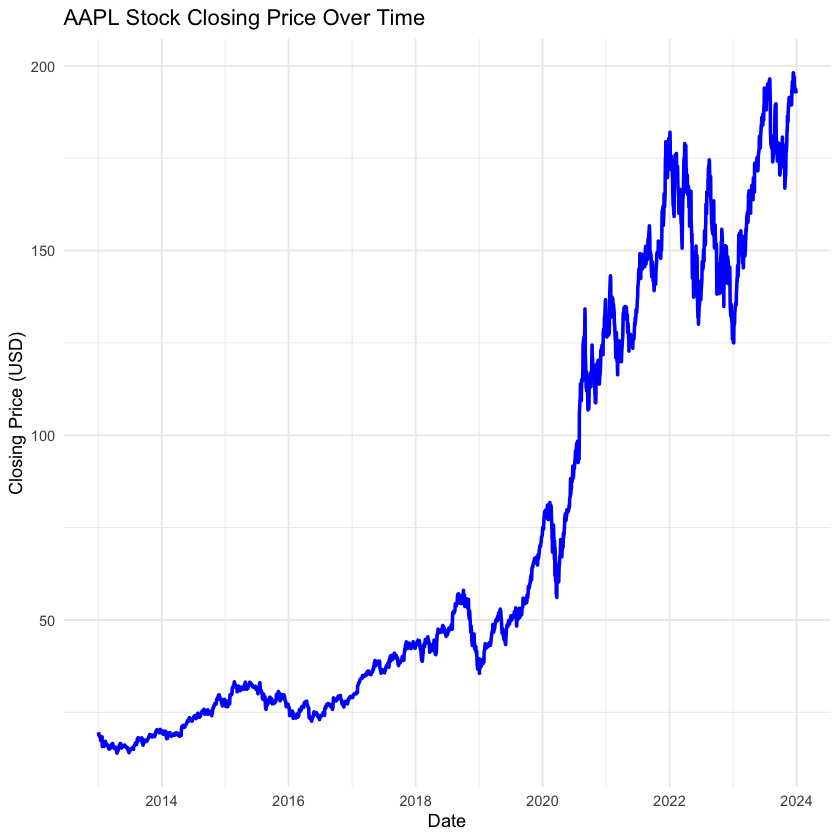

In [11]:
# Load necessary library
library(ggplot2)

# Ensure the results directory exists
if (!dir.exists("../results")) {
  dir.create("../results", recursive = TRUE)
}

# Convert Date column to Date format
aapl_data$Date <- as.Date(aapl_data$Date)

# Create the plot
closing_price_plot <- ggplot(aapl_data, aes(x = Date, y = AAPL.Close)) +
  geom_line(color = "blue", linewidth = 1) +  # Fix warning: use linewidth instead of size
  labs(title = "AAPL Stock Closing Price Over Time",
       x = "Date", y = "Closing Price (USD)") +
  theme_minimal()

# Display plot
print(closing_price_plot)

# Save the plot
ggsave("../results/aapl_closing_price.png", plot = closing_price_plot, width = 10, height = 6, dpi = 300)

cat("✅ Plot saved successfully in results/aapl_closing_price.png\n")

✅ Moving Averages plot saved successfully in results/aapl_moving_averages.png


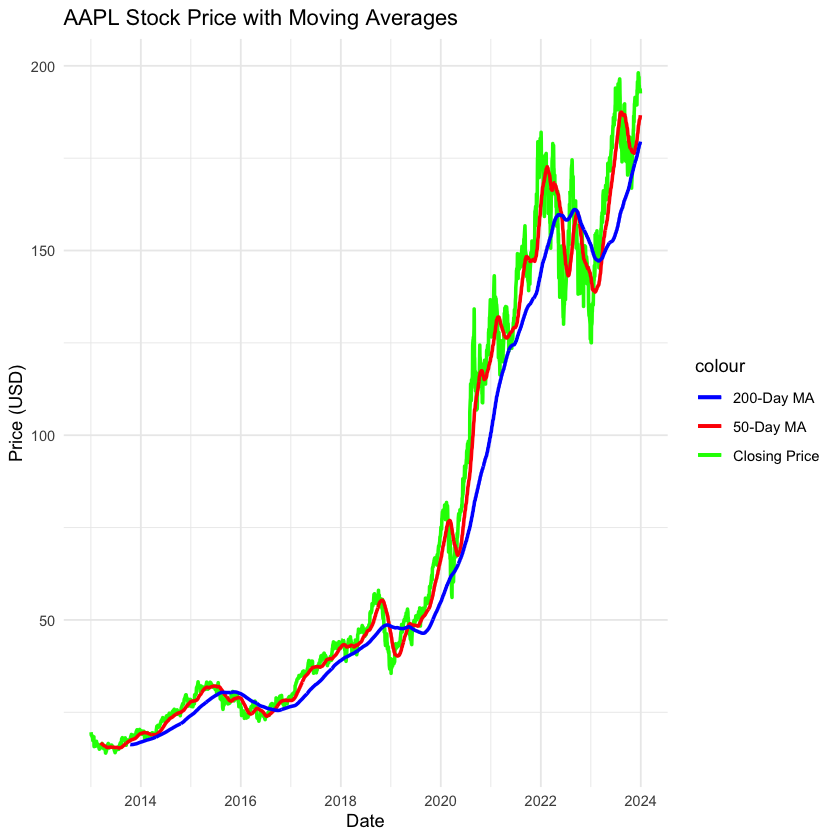

In [12]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(zoo)

# Ensure the results directory exists
if (!dir.exists("../results")) {
  dir.create("../results", recursive = TRUE)
}

# Compute 50-day and 200-day moving averages
aapl_data <- aapl_data %>%
  mutate(MA50 = zoo::rollmean(AAPL.Close, 50, fill = NA, align = "right"),
         MA200 = zoo::rollmean(AAPL.Close, 200, fill = NA, align = "right"))

# Create the plot with Moving Averages
moving_avg_plot <- ggplot(aapl_data, aes(x = Date)) +
  geom_line(aes(y = AAPL.Close, color = "Closing Price"), linewidth = 1, na.rm = TRUE) +  # Fix warning
  geom_line(aes(y = MA50, color = "50-Day MA"), linewidth = 1, na.rm = TRUE) +
  geom_line(aes(y = MA200, color = "200-Day MA"), linewidth = 1, na.rm = TRUE) +
  labs(title = "AAPL Stock Price with Moving Averages",
       x = "Date", y = "Price (USD)") +
  scale_color_manual(values = c("blue", "red", "green")) +
  theme_minimal()

# Display plot
print(moving_avg_plot)

# Save the plot
ggsave("../results/aapl_moving_averages.png", plot = moving_avg_plot, width = 10, height = 6, dpi = 300)

cat("✅ Moving Averages plot saved successfully in results/aapl_moving_averages.png\n")

✅ Daily Returns histogram saved successfully in results/aapl_daily_returns.png


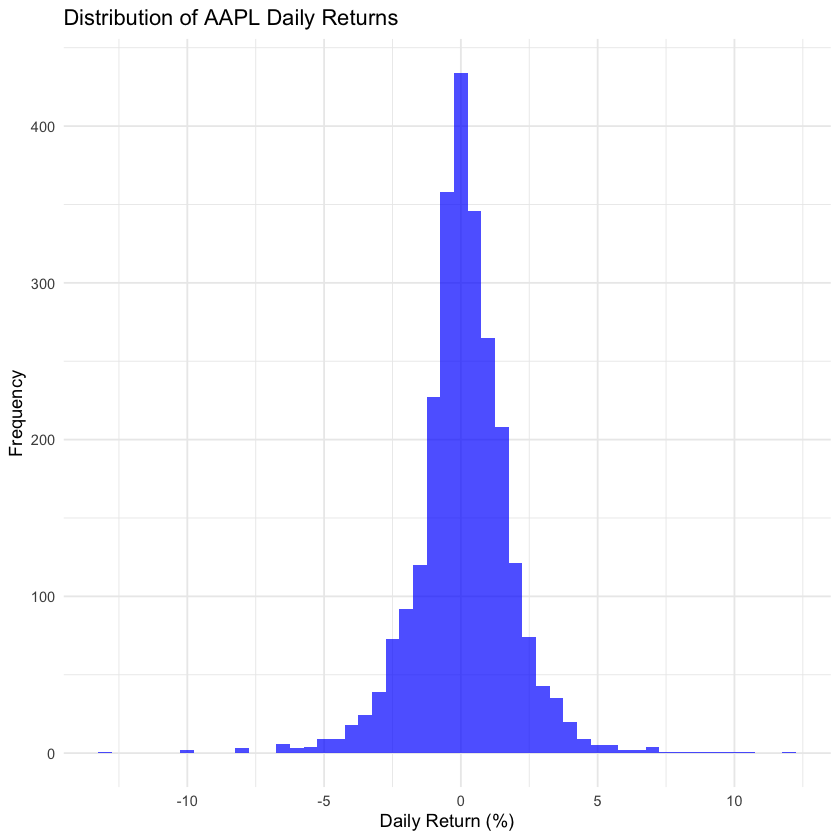

In [13]:
# Load necessary libraries
library(ggplot2)
library(dplyr)

# Ensure the results directory exists
if (!dir.exists("../results")) {
  dir.create("../results", recursive = TRUE)
}

# Compute daily returns and remove NA values
aapl_data <- aapl_data %>%
  mutate(Daily_Return = (AAPL.Close - lag(AAPL.Close)) / lag(AAPL.Close) * 100) %>%
  na.omit()  # Remove missing values

# Create the histogram plot
daily_returns_plot <- ggplot(aapl_data, aes(x = Daily_Return)) +
  geom_histogram(binwidth = 0.5, fill = "blue", alpha = 0.7) +
  labs(title = "Distribution of AAPL Daily Returns",
       x = "Daily Return (%)", y = "Frequency") +
  theme_minimal()

# Display plot
print(daily_returns_plot)

# Save the plot
ggsave("../results/aapl_daily_returns.png", plot = daily_returns_plot, width = 10, height = 6, dpi = 300)

cat("✅ Daily Returns histogram saved successfully in results/aapl_daily_returns.png\n")

## Time-Series Forecasting for Stock Prices

In [14]:
install.packages("forecast", repos = "https://cloud.r-project.org/")


The downloaded binary packages are in
	/var/folders/23/phyj43kx4jz5gywlx6__9_kc0000gn/T//RtmpJiy7g1/downloaded_packages


In [15]:
install.packages(c("quadprog", "fracdiff", "lmtest", "tseries", "urca"), repos = "https://cloud.r-project.org/")


The downloaded binary packages are in
	/var/folders/23/phyj43kx4jz5gywlx6__9_kc0000gn/T//RtmpJiy7g1/downloaded_packages


In [16]:
library(forecast)

Warning message:
“package ‘forecast’ was built under R version 4.3.3”


In [17]:
# Load necessary libraries
library(forecast)
library(tseries)
library(ggplot2)
library(dplyr)

Warning message:
“package ‘tseries’ was built under R version 4.3.3”


### Preparing the Data for Forecasting

✅ Time-series plot saved successfully in results/aapl_time_series.png


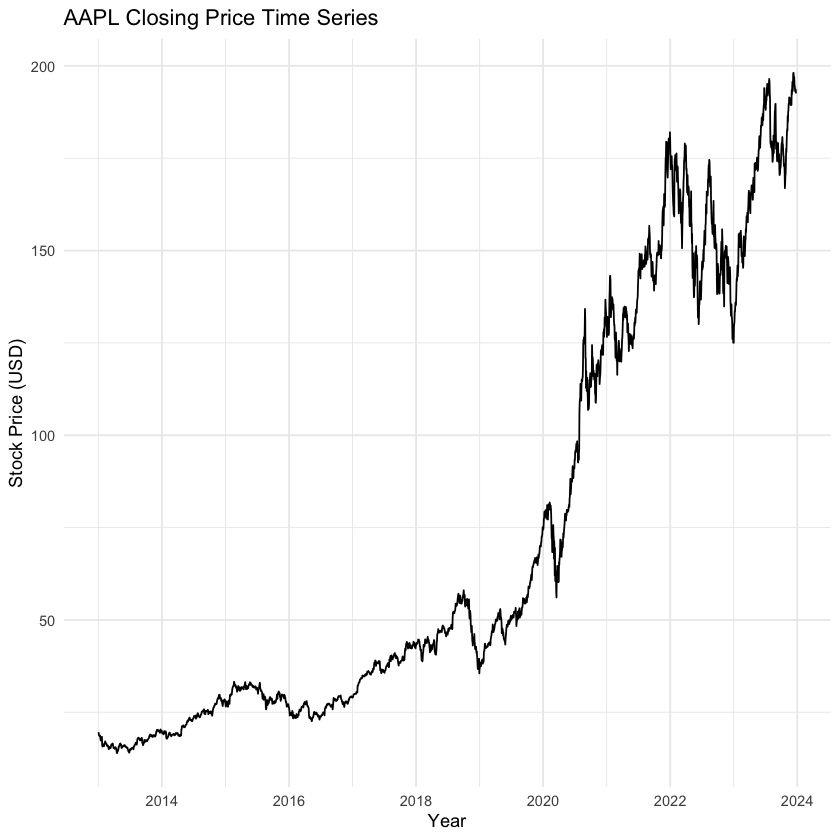

In [18]:
# Load necessary libraries
library(ggplot2)
library(forecast)

# Ensure results directory exists
if (!dir.exists("../results")) {
  dir.create("../results", recursive = TRUE)
}

# Load cleaned stock data
file_path <- "../data/processed/aapl_stock_data_cleaned.csv"
aapl_data <- read.csv(file_path)

# Convert Date column to Date format
aapl_data$Date <- as.Date(aapl_data$Date)

# Convert Closing Price into a time series object
ts_data <- ts(aapl_data$AAPL.Close, start = c(year(min(aapl_data$Date)), month(min(aapl_data$Date))), frequency = 252)  # 252 trading days in a year

# Create the time series plot
ts_plot <- autoplot(ts_data) + 
  labs(title = "AAPL Closing Price Time Series",
       x = "Year", y = "Stock Price (USD)") +
  theme_minimal()

# Display plot
print(ts_plot)

# Save the plot
ggsave("../results/aapl_time_series.png", plot = ts_plot, width = 10, height = 6, dpi = 300)

cat("✅ Time-series plot saved successfully in results/aapl_time_series.png\n")

### ARIMA Model for Forecasting

Series: ts_data 
ARIMA(0,1,0)(0,0,1)[252] with drift 

Coefficients:
         sma1   drift
      -0.0689  0.0618
s.e.   0.0201  0.0294

sigma^2 = 2.726:  log likelihood = -5313.11
AIC=10632.23   AICc=10632.24   BIC=10650

Training set error measures:
                        ME     RMSE       MAE         MPE     MAPE       MASE
Training set -0.0004624088 1.650099 0.9485752 -0.09290899 1.257586 0.05142657
                    ACF1
Training set -0.04014285

✅ ARIMA forecast plot saved successfully in results/aapl_arima_forecast.png


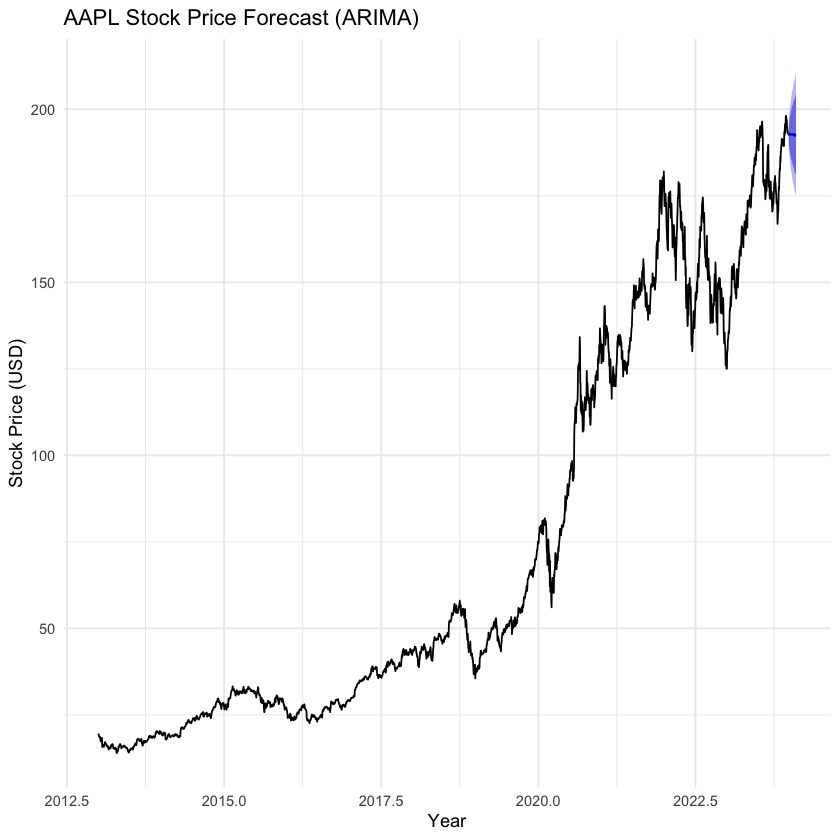

In [19]:
# Load necessary libraries
library(forecast)
library(ggplot2)

# Ensure results directory exists
if (!dir.exists("../results")) {
  dir.create("../results", recursive = TRUE)
}

# Fit ARIMA model
arima_model <- auto.arima(ts_data)

# Summary of the model
summary(arima_model)

# Forecast for next 30 days
forecast_arima <- forecast(arima_model, h = 30)

# Create the ARIMA forecast plot
arima_plot <- autoplot(forecast_arima) +
  labs(title = "AAPL Stock Price Forecast (ARIMA)",
       x = "Year", y = "Stock Price (USD)") +
  theme_minimal()

# Display plot
print(arima_plot)

# Save the plot
ggsave("../results/aapl_arima_forecast.png", plot = arima_plot, width = 10, height = 6, dpi = 300)

cat("✅ ARIMA forecast plot saved successfully in results/aapl_arima_forecast.png\n")

### STLF (Seasonal and Trend decomposition using Loess Forecasting) Model

✅ Seasonal ETS forecast plot saved successfully in results/aapl_stlf_forecast.png


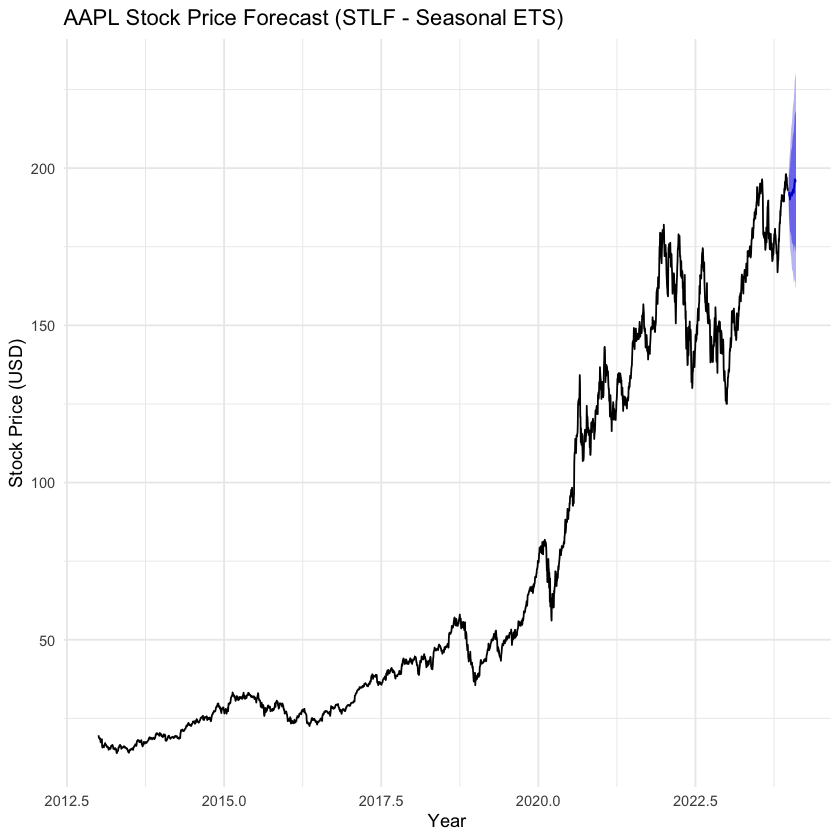

In [20]:
# Load necessary libraries
library(forecast)
library(ggplot2)

# Ensure results directory exists
if (!dir.exists("../results")) {
  dir.create("../results", recursive = TRUE)
}

# Fit seasonal decomposition using Loess (stlf)
stlf_model <- stlf(ts_data, method = "ets")  # Use ETS inside stlf

# Forecast for next 30 days
forecast_stlf <- forecast(stlf_model, h = 30)

# Create the seasonal forecast plot
stlf_plot <- autoplot(forecast_stlf) +
  labs(title = "AAPL Stock Price Forecast (STLF - Seasonal ETS)",
       x = "Year", y = "Stock Price (USD)") +
  theme_minimal()

# Display plot
print(stlf_plot)

# Save the plot
ggsave("../results/aapl_stlf_forecast.png", plot = stlf_plot, width = 10, height = 6, dpi = 300)

cat("✅ Seasonal ETS forecast plot saved successfully in results/aapl_stlf_forecast.png\n")

## Evaluating Forecasting Model Performance (ARIMA & STLF)

In [21]:
install.packages("Metrics", repos = "https://cloud.r-project.org/")


The downloaded binary packages are in
	/var/folders/23/phyj43kx4jz5gywlx6__9_kc0000gn/T//RtmpJiy7g1/downloaded_packages


In [22]:
# Load necessary libraries
library(forecast)
library(Metrics)  # For additional evaluation metrics

Warning message:
“package ‘Metrics’ was built under R version 4.3.3”

Attaching package: ‘Metrics’


The following object is masked from ‘package:forecast’:

    accuracy




In [23]:
evaluate_forecast <- function(actual, predicted) {
  # Ensure actual and predicted lengths match
  if (length(actual) != length(predicted)) {
    stop("Error: Length mismatch between actual and predicted values.")
  }
  
  # Prevent division by zero in MAPE
  actual_safe <- ifelse(actual == 0, 1e-6, actual)  # Replace 0 with small value
  
  # Compute metrics
  rmse_value <- rmse(actual, predicted)
  mape_value <- mape(actual_safe, predicted) * 100  # Convert to percentage
  mae_value <- mae(actual, predicted)
  
  return(data.frame(RMSE = rmse_value, MAPE = mape_value, MAE = mae_value))
}

In [24]:
# Get actual values (last 30 days) as a numeric vector
actual_values <- as.numeric(tail(ts_data, 30))

# Get ARIMA forecasted values (convert to numeric)
arima_predicted <- as.numeric(forecast_arima$mean)

# Compute ARIMA performance metrics
arima_performance <- evaluate_forecast(actual_values, arima_predicted)

# Print ARIMA results
print("✅ ARIMA Forecast Performance Metrics:")
print(arima_performance)

[1] "✅ ARIMA Forecast Performance Metrics:"
      RMSE     MAPE      MAE
1 2.680892 1.182326 2.287943


In [25]:
# Convert STLF forecasted values to a numeric vector
stlf_predicted <- as.numeric(forecast_stlf$mean)

# Compute STLF performance metrics
stlf_performance <- evaluate_forecast(actual_values, stlf_predicted)

# Print STLF results
print("✅ STLF Forecast Performance Metrics:")
print(stlf_performance)

[1] "✅ STLF Forecast Performance Metrics:"
      RMSE     MAPE      MAE
1 2.475543 1.054115 2.045304


In [26]:
# Ensure results folder exists
if (!dir.exists("../results")) {
  dir.create("../results", recursive = TRUE)
}

# Check if performance metrics exist
if (exists("arima_performance") && exists("stlf_performance")) {
  
  # Ensure values are numeric
  performance_results <- data.frame(
    Model = c("ARIMA", "STLF"),
    RMSE = as.numeric(c(arima_performance$RMSE, stlf_performance$RMSE)),
    MAPE = as.numeric(c(arima_performance$MAPE, stlf_performance$MAPE)),
    MAE = as.numeric(c(arima_performance$MAE, stlf_performance$MAE))
  )
  
  # Print results for verification
  print("✅ Forecast Performance Results:")
  print(performance_results)
  
  # Save performance results as CSV
  write.csv(performance_results, "../results/forecast_performance.csv", row.names = FALSE)
  
  cat("✅ Forecast performance metrics saved in results/forecast_performance.csv\n")

} else {
  cat("❌ Error: Performance metrics missing. Ensure ARIMA and STLF models were evaluated.\n")
}

[1] "✅ Forecast Performance Results:"
  Model     RMSE     MAPE      MAE
1 ARIMA 2.680892 1.182326 2.287943
2  STLF 2.475543 1.054115 2.045304
✅ Forecast performance metrics saved in results/forecast_performance.csv


## Key Observations
1️⃣ STLF performed better than ARIMA in all metrics:

Lower RMSE (2.47 vs. 2.68) → STLF had a smaller prediction error.
Lower MAPE (1.05% vs. 1.18%) → STLF provided more accurate percentage predictions.
Lower MAE (2.04 vs. 2.28) → STLF’s absolute errors were smaller.
2️⃣ STLF’s ability to handle seasonality likely improved predictions:

ARIMA does not explicitly model seasonality unless manually tuned.
STLF (seasonal ETS) decomposes the time series, leading to better generalization.